# MC - Variance Reduction Technique
Simple code to show MC with Antithetic Variates

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def european_call_mc(
    s0: float,
    K: float,
    r: float,
    q: float,
    sigma: float,
    T: float,
    n: int,
    seed: int = 0
) -> Tuple[float, np.ndarray]:
    rng = np.random.default_rng(seed=seed)
    Z = rng.standard_normal(size=n)
    ST = s0 * np.exp((r - q - 0.5 * sigma * sigma) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0.0)
    return np.exp(-r * T) * payoff.mean(), payoff

def european_call_mc_antithetic(
    s0: float,
    K: float,
    r: float,
    q: float,
    sigma: float,
    T: float,
    n: int,
    seed: int = 0
) -> Tuple[float, np.ndarray]:
    rng = np.random.default_rng(seed)
    Z = rng.standard_normal(n)
    
    # Antithetic Set up
    ST1 = s0 * np.exp((r - q - 0.5 * sigma * sigma) * T + sigma * np.sqrt(T) * Z)
    ST2 = s0 * np.exp((r - q - 0.5 * sigma * sigma) * T + sigma * np.sqrt(T) * (-Z))
    payoff = 0.5 * (np.maximum(ST1 - K, 0.0) + np.maximum(ST2 - K, 0.0))
    return np.exp(-r * T) * payoff.mean(), payoff

In [ ]:
# Parameters for Option

# Option details 
K, r, q, sigma, T =  100, 0.05, 0.0, 0.2, 1.0

s0_otm = 50
s0_atm = 100
s0_itm = 300

# Run multiple seeds to see variability
n_runs: int = 100

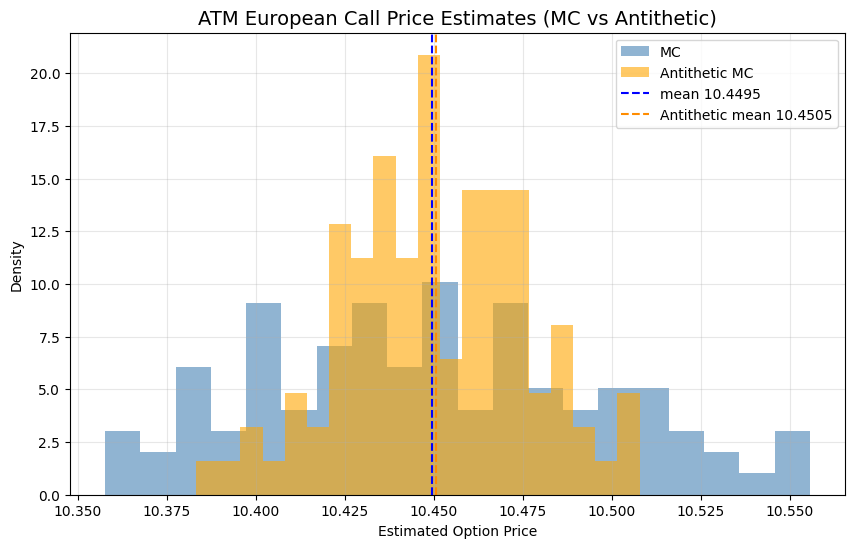

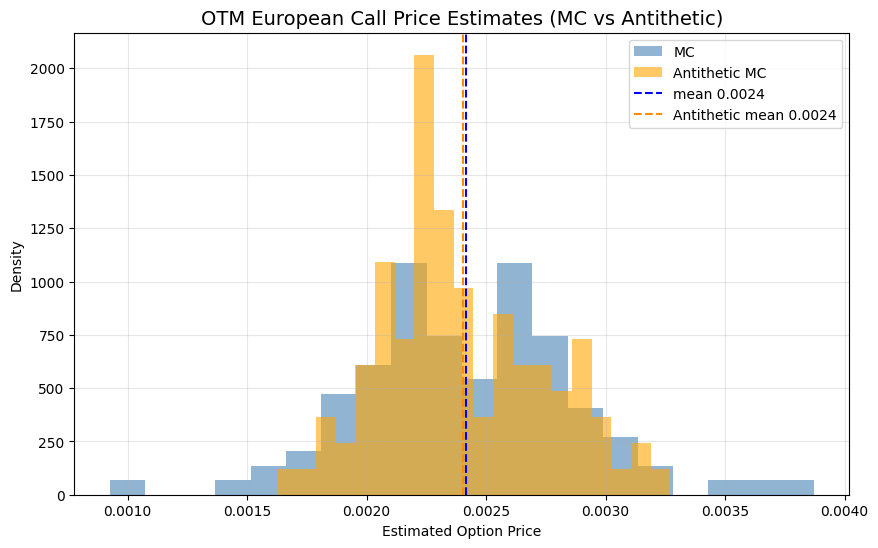

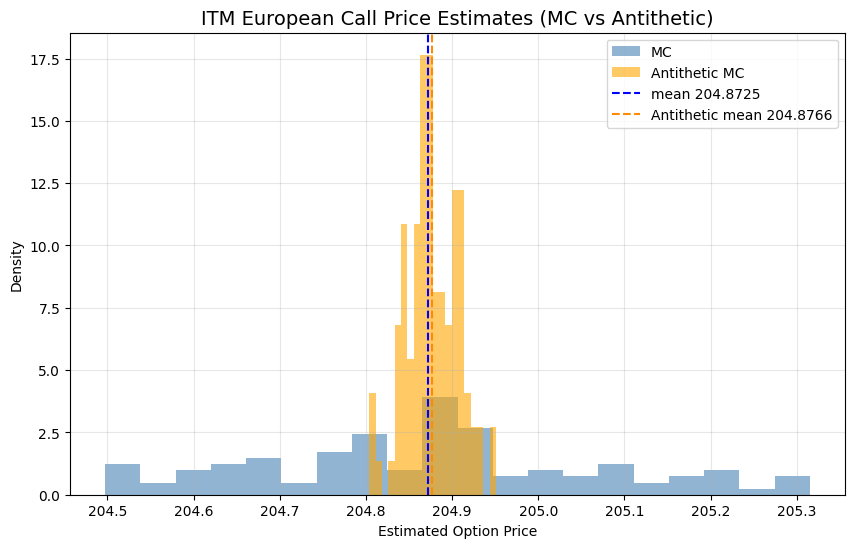

In [33]:
n_paths: int = 100000

mc_estimates_otm = np.array([
    european_call_mc(s0_otm, K, r, q, sigma, T, n_paths, seed=seed)[0]
    for seed in range(n_runs)
])

mc_anti_estimates_otm = np.array([
    european_call_mc_antithetic(s0_otm, K, r, q, sigma, T, n_paths, seed=seed)[0]
    for seed in range(n_runs)
])

mc_estimates_atm = np.array([
    european_call_mc(s0_atm, K, r, q, sigma, T, n_paths, seed=seed)[0]
    for seed in range(n_runs)
])

mc_anti_estimates_atm = np.array([
    european_call_mc_antithetic(s0_atm, K, r, q, sigma, T, n_paths, seed=seed)[0]
    for seed in range(n_runs)
])

mc_estimates_itm = np.array([
    european_call_mc(s0_itm, K, r, q, sigma, T, n_paths, seed=seed)[0]
    for seed in range(n_runs)
])

mc_anti_estimates_itm = np.array([
    european_call_mc_antithetic(s0_itm, K, r, q, sigma, T, n_paths, seed=seed)[0]
    for seed in range(n_runs)
])

# Plot distributions of estimates for ATM
plt.figure(figsize=(10, 6))
plt.hist(mc_estimates_atm, bins=20, alpha=0.6, label="MC", density=True, color="steelblue")
plt.hist(mc_anti_estimates_atm, bins=20, alpha=0.6, label="Antithetic MC", density=True, color="orange")
plt.axvline(np.mean(mc_estimates_atm), color='blue', linestyle='--', label=f"mean {np.mean(mc_estimates_atm):.4f}")
plt.axvline(np.mean(mc_anti_estimates_atm), color='darkorange', linestyle='--', label=f"Antithetic mean {np.mean(mc_anti_estimates_atm):.4f}")
plt.title("ATM European Call Price Estimates (MC vs Antithetic)", fontsize=14)
plt.xlabel("Estimated Option Price")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot distributions of estimates for OTM
plt.figure(figsize=(10, 6))
plt.hist(mc_estimates_otm, bins=20, alpha=0.6, label="MC", density=True, color="steelblue")
plt.hist(mc_anti_estimates_otm, bins=20, alpha=0.6, label="Antithetic MC", density=True, color="orange")
plt.axvline(np.mean(mc_estimates_otm), color='blue', linestyle='--', label=f"mean {np.mean(mc_estimates_otm):.4f}")
plt.axvline(np.mean(mc_anti_estimates_otm), color='darkorange', linestyle='--', label=f"Antithetic mean {np.mean(mc_anti_estimates_otm):.4f}")
plt.title("OTM European Call Price Estimates (MC vs Antithetic)", fontsize=14)
plt.xlabel("Estimated Option Price")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot distributions of estimates for ITM
plt.figure(figsize=(10, 6))
plt.hist(mc_estimates_itm, bins=20, alpha=0.6, label="MC", density=True, color="steelblue")
plt.hist(mc_anti_estimates_itm, bins=20, alpha=0.6, label="Antithetic MC", density=True, color="orange")
plt.axvline(np.mean(mc_estimates_itm), color='blue', linestyle='--', label=f"mean {np.mean(mc_estimates_itm):.4f}")
plt.axvline(np.mean(mc_anti_estimates_itm), color='darkorange', linestyle='--', label=f"Antithetic mean {np.mean(mc_anti_estimates_itm):.4f}")
plt.title("ITM European Call Price Estimates (MC vs Antithetic)", fontsize=14)
plt.xlabel("Estimated Option Price")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

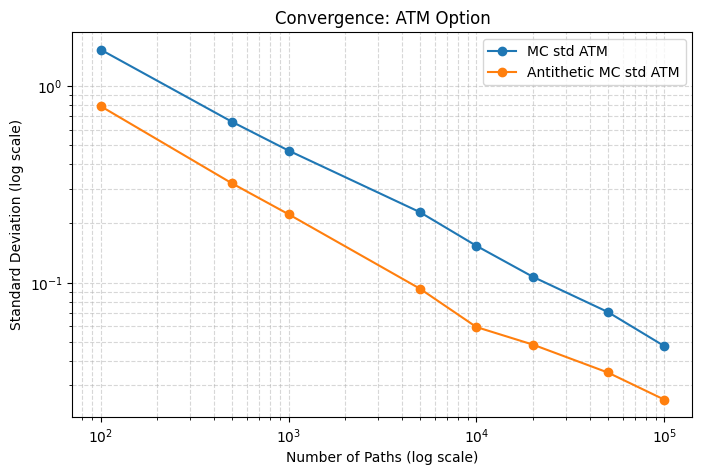

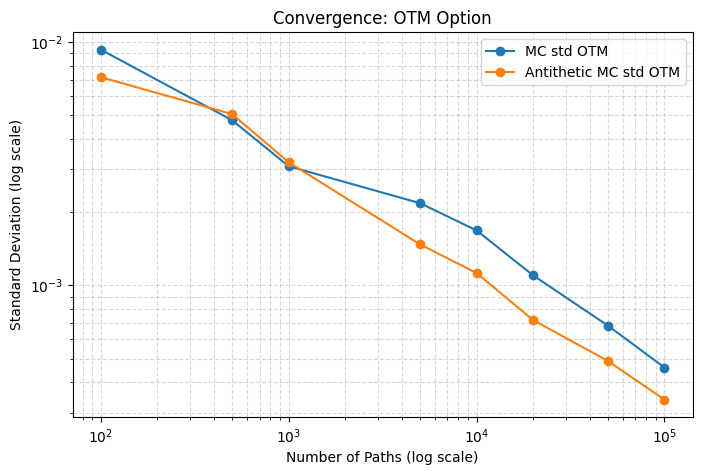

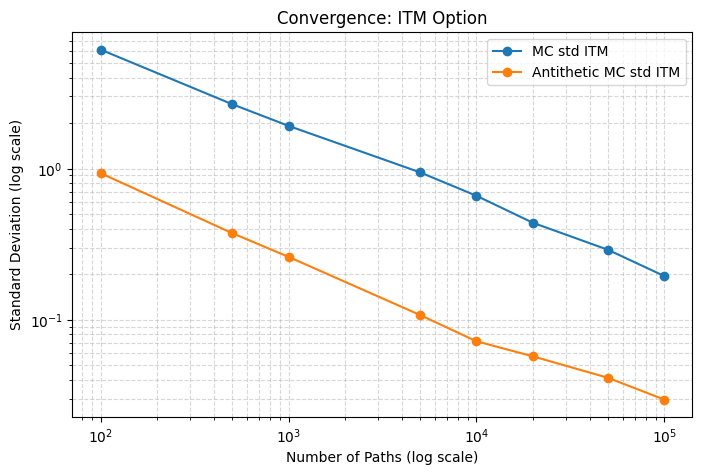

In [35]:

path_list = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]

# Store stds for each moneyness
mc_std_otm, mc_anti_std_otm = [], []
mc_std_atm, mc_anti_std_atm = [], []
mc_std_itm, mc_anti_std_itm = [], []

for n_paths in path_list:
    seeds = np.arange(n_runs)
    # OTM
    mc_estimates_otm = np.array([
        european_call_mc(s0_otm, K, r, q, sigma, T, n_paths, seed=int(seed))[0]
        for seed in seeds
    ])
    mc_anti_estimates_otm = np.array([
        european_call_mc_antithetic(s0_otm, K, r, q, sigma, T, n_paths, seed=int(seed))[0]
        for seed in seeds
    ])
    mc_std_otm.append(np.std(mc_estimates_otm))
    mc_anti_std_otm.append(np.std(mc_anti_estimates_otm))
    # ATM
    mc_estimates_atm = np.array([
        european_call_mc(s0_atm, K, r, q, sigma, T, n_paths, seed=int(seed))[0]
        for seed in seeds
    ])
    mc_anti_estimates_atm = np.array([
        european_call_mc_antithetic(s0_atm, K, r, q, sigma, T, n_paths, seed=int(seed))[0]
        for seed in seeds
    ])
    mc_std_atm.append(np.std(mc_estimates_atm))
    mc_anti_std_atm.append(np.std(mc_anti_estimates_atm))
    # ITM
    mc_estimates_itm = np.array([
        european_call_mc(s0_itm, K, r, q, sigma, T, n_paths, seed=int(seed))[0]
        for seed in seeds
    ])
    mc_anti_estimates_itm = np.array([
        european_call_mc_antithetic(s0_itm, K, r, q, sigma, T, n_paths, seed=int(seed))[0]
        for seed in seeds
    ])
    mc_std_itm.append(np.std(mc_estimates_itm))
    mc_anti_std_itm.append(np.std(mc_anti_estimates_itm))

# Plot for ATM
plt.figure(figsize=(8, 5))
plt.plot(path_list, mc_std_atm, marker='o', label="MC std ATM")
plt.plot(path_list, mc_anti_std_atm, marker='o', label="Antithetic MC std ATM")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Paths (log scale)")
plt.ylabel("Standard Deviation (log scale)")
plt.title("Convergence: ATM Option")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# Plot for OTM
plt.figure(figsize=(8, 5))
plt.plot(path_list, mc_std_otm, marker='o', label="MC std OTM")
plt.plot(path_list, mc_anti_std_otm, marker='o', label="Antithetic MC std OTM")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Paths (log scale)")
plt.ylabel("Standard Deviation (log scale)")
plt.title("Convergence: OTM Option")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# Plot for ITM
plt.figure(figsize=(8, 5))
plt.plot(path_list, mc_std_itm, marker='o', label="MC std ITM")
plt.plot(path_list, mc_anti_std_itm, marker='o', label="Antithetic MC std ITM")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Paths (log scale)")
plt.ylabel("Standard Deviation (log scale)")
plt.title("Convergence: ITM Option")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()